## 作業
當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可將低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv)

包含客戶特徵

- Account Balance(帳戶餘額): 沒有帳號(1), 沒有餘額 (2), 部分存款 (3)
- Payment Status(付款狀況): 有問題 (1), 付清 (2), 於該銀行沒有問題(3)
- Savings/Stock Value (存款): 沒有, 少於 100, 100 ~ 1,000, 高於1,000
- Employment Length(工作長短): 少於 1 年, 1 ~ 4年, 4 ~ 7年, 高於 7 年
- Sex/Marital Status(性別與婚姻): 男生/女生, 單身/離婚/已婚/鰥夫
- No of Credits at this bank(貸款數): 1, >1
- Guarantor(保人): None, Yes
- Concurrent Credits(其他貸款數): 其他銀行或百貨, None
- ForeignWorker (外國工作者)
- Purpose of Credit(貸款目的): New car, Used car, Home Related, Other
預測目標

- Creditability (可信客戶): 1/0


請用Python 回答以下問題：

- 使用Pandas 將資料讀取到一名為 df 的 DataFrame 中
- 請將資料分為訓練與測試資料集,其中訓練資料集占80%, 測試資料集占20%
- 請使用邏輯式迴歸建立模型 (目標 y 為 Creditability)
- 請使用隨機森林建立模型 (目標 y 為 Creditability)
- 請計算出模型準確度(Accuracy)?
- 請求出混淆矩陣(Confusion Matrix)?
- 請繪製隨機森林模型與的邏輯式迴歸 ROC Curve, 並比較兩者的 AUC?

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv', index_col = 0)

In [4]:
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [5]:
df.isna().sum()

Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 497 to 385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availa

In [0]:
from sklearn.model_selection import train_test_split
y = df.iloc[:,0]
X = df.iloc[:,1:]
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [8]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((400, 20), (100, 20), (400,), (100,))

In [20]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(max_iter = 1000)
clf1.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=1000, max_depth = 5)
clf2.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predicted1 = clf1.predict(test_X)
predicted2 = clf2.predict(test_X)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted1)

0.71

In [32]:
confusion_matrix(test_y, predicted1)

array([[10, 21],
       [ 8, 61]])

In [33]:
accuracy_score(test_y, predicted2)

0.73

In [34]:
confusion_matrix(test_y, predicted2)

array([[ 6, 25],
       [ 2, 67]])

In [0]:
predicted1_prob = clf1.predict_proba(test_X)
predicted2_prob = clf2.predict_proba(test_X)

In [0]:
from sklearn.metrics import auc, roc_curve
fpr1, tpr1, threshold1 = roc_curve(test_y , predicted1_prob[:,1])
auc1 = auc(fpr1, tpr1)

In [0]:
from sklearn.metrics import auc, roc_curve
fpr2, tpr2, threshold2 = roc_curve(test_y , predicted2_prob[:,1])
auc2 = auc(fpr2, tpr2)

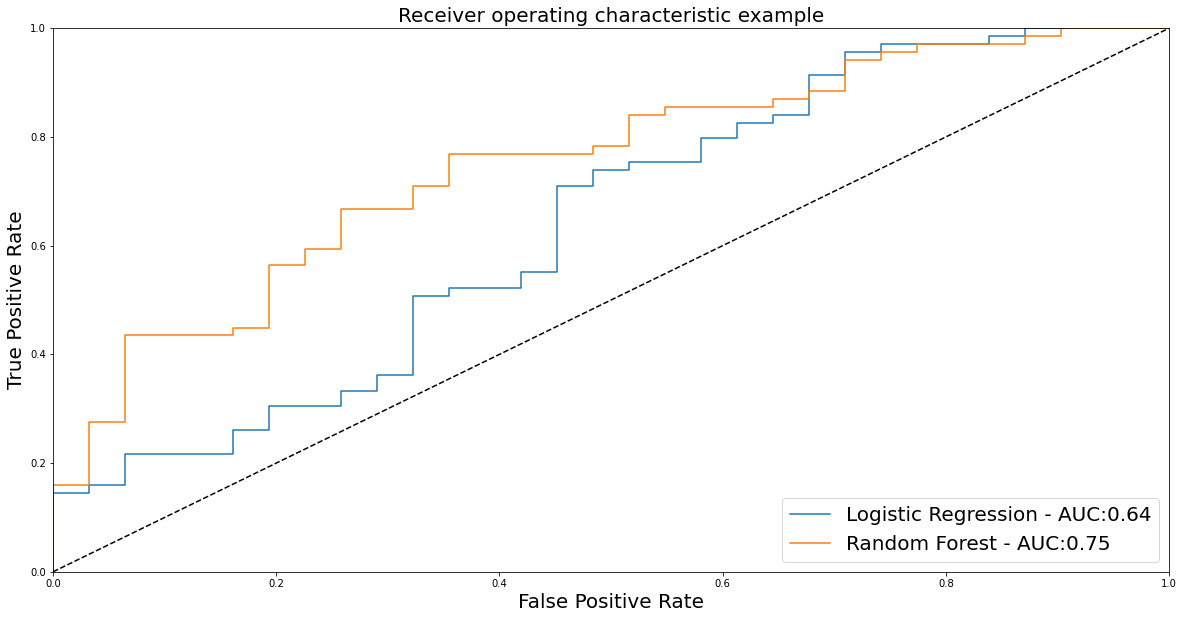

In [50]:
from matplotlib import pyplot as plt
plt.figure(figsize= [20,10])
plt.plot(fpr1, tpr1, label='%s - AUC:%.2f'%('Logistic Regression', auc1) )
plt.plot(fpr2, tpr2, label='%s - AUC:%.2f'%('Random Forest', auc2) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 借貸俱樂部資料分析
- https://drive.google.com/open?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo

In [52]:
! gdown https://drive.google.com/uc?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo

Downloading...
From: https://drive.google.com/uc?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo
To: /content/LoanStats3b.csv.zip
36.6MB [00:00, 70.9MB/s]


In [53]:
! unzip LoanStats3b.csv.zip

Archive:  LoanStats3b.csv.zip
  inflating: LoanStats3b.csv         


### 資料讀取

In [62]:
import pandas as pd
#讀取資料
dataset = pd.read_csv('LoanStats3b.csv', skiprows=[0])
dataset.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,47,123,124,125,128,129,130,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188183 entries, 0 to 188182
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 208.2+ MB



### 資料預先處理

In [63]:
dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [64]:
dataset.isna().sum()

id                       188181
member_id                188183
loan_amnt                     2
funded_amnt                   2
funded_amnt_inv               2
                          ...  
settlement_status        186132
settlement_date          186132
settlement_amount        186132
settlement_percentage    186132
settlement_term          186132
Length: 145, dtype: int64

In [65]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan], dtype=object)

In [0]:
#移除空白欄位
dataset = dataset.iloc[:,2:111]
empty_cols = [i for i in range(45,72)]
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)
data_with_loanstatus_sliced = dataset[(dataset['loan_status']=="Fully Paid") | (dataset['loan_status']=="Charged Off")]

In [105]:
data_with_loanstatus_sliced.shape

(188171, 82)

In [106]:
data_with_loanstatus_sliced.isna().sum().sort_values(ascending= False)

url                               188171
mths_since_last_record            170698
mths_since_recent_bc_dlq          151423
mths_since_recent_revol_delinq    133728
mths_since_last_delinq            107568
                                   ...  
revol_bal                              0
pub_rec                                0
open_acc                               0
inq_last_6mths                         0
loan_amnt                              0
Length: 82, dtype: int64

In [107]:
empty_cols = data_with_loanstatus_sliced.isna().sum() / len(data_with_loanstatus_sliced)
empty_cols[empty_cols > 0.1].index

Index(['url', 'desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'avg_cur_bal', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
       'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'tot_hi_cred_lim', 'total_il_high_credit_limit'],
      dtype='object')

In [0]:
del_col_names = ["delinq_2yrs", "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title",
"term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line",
"initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m",
"num_accts_ever_120_pd", "delinq_amnt",
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"]

In [0]:
dataset = data_with_loanstatus_sliced.drop(labels = del_col_names, axis = 1)

In [110]:
dataset.shape

(188171, 60)

In [0]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
"last_pymnt_amnt",
"mort_acc",
"pub_rec",
"int_rate", "open_acc",
"num_actv_rev_tl",
"mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
"avg_cur_bal","acc_open_past_24mths",'loan_status'] 

In [0]:
Final_data = dataset[features] 

In [113]:
Final_data.shape

(188171, 18)

In [114]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188171 entries, 0 to 188180
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            188171 non-null  float64
 1   emp_length             180284 non-null  object 
 2   annual_inc             188171 non-null  float64
 3   home_ownership         188171 non-null  object 
 4   grade                  188171 non-null  object 
 5   last_pymnt_amnt        188171 non-null  float64
 6   mort_acc               180676 non-null  float64
 7   pub_rec                188171 non-null  float64
 8   int_rate               188171 non-null  object 
 9   open_acc               188171 non-null  float64
 10  num_actv_rev_tl        160430 non-null  float64
 11  mo_sin_rcnt_rev_tl_op  160429 non-null  float64
 12  mo_sin_old_rev_tl_op   160429 non-null  float64
 13  bc_util                179059 non-null  float64
 14  bc_open_to_buy         179146 non-nu

In [115]:
Final_data.select_dtypes('object').head()

,emp_length,home_ownership,grade,int_rate,loan_status
0,3 years,MORTGAGE,A,7.62%,Fully Paid
1,10+ years,OWN,B,10.99%,Fully Paid
2,10+ years,MORTGAGE,B,11.99%,Fully Paid
3,5 years,MORTGAGE,A,7.62%,Fully Paid
4,4 years,RENT,B,10.99%,Fully Paid


In [0]:
Final_data = Final_data[Final_data["int_rate"].notnull()]

### 將字串欄位改變成數值型態

In [0]:
Final_data["int_rate"] = Final_data["int_rate"].map(lambda x:float(x[:-1]) )

In [0]:
Final_data['grade'] = Final_data['grade'].replace({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})


In [0]:
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})


In [0]:
import re
def getEmpNum(e):
  m = re.search('(\d+)', str(e) )
  if m :
    return m.group(1)
  else:
    return 0
Final_data['emp_length'] = Final_data['emp_length'].map(lambda e: getEmpNum(e))

In [0]:
Final_data['loan_status']= Final_data['loan_status'].replace({"Fully Paid":0, "Charged Off":1})


In [122]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188171 entries, 0 to 188180
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            188171 non-null  float64
 1   emp_length             188171 non-null  object 
 2   annual_inc             188171 non-null  float64
 3   home_ownership         188171 non-null  int64  
 4   grade                  188171 non-null  int64  
 5   last_pymnt_amnt        188171 non-null  float64
 6   mort_acc               180676 non-null  float64
 7   pub_rec                188171 non-null  float64
 8   int_rate               188171 non-null  float64
 9   open_acc               188171 non-null  float64
 10  num_actv_rev_tl        160430 non-null  float64
 11  mo_sin_rcnt_rev_tl_op  160429 non-null  float64
 12  mo_sin_old_rev_tl_op   160429 non-null  float64
 13  bc_util                179059 non-null  float64
 14  bc_open_to_buy         179146 non-nu

In [125]:
Final_data.isna().sum().sort_values(ascending = False)

avg_cur_bal              27747
mo_sin_old_rev_tl_op     27742
mo_sin_rcnt_rev_tl_op    27742
num_actv_rev_tl          27741
bc_util                   9112
bc_open_to_buy            9025
acc_open_past_24mths      7495
mort_acc                  7495
loan_status                  0
grade                        0
emp_length                   0
annual_inc                   0
home_ownership               0
int_rate                     0
last_pymnt_amnt              0
pub_rec                      0
open_acc                     0
funded_amnt                  0
dtype: int64

In [0]:
Final_data.fillna(Final_data.mean(), inplace=True)

In [128]:
Final_data.isna().sum().sort_values(ascending = False)

loan_status              0
acc_open_past_24mths     0
emp_length               0
annual_inc               0
home_ownership           0
grade                    0
last_pymnt_amnt          0
mort_acc                 0
pub_rec                  0
int_rate                 0
open_acc                 0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
funded_amnt              0
dtype: int64